In [1]:
import tensorflow.compat.v1 as tf1
# import tensorflow as tf2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
session = tf1.Session(config=config)

2024-05-13 16:33:51.017957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 16:33:51.317995: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 16:33:52.952371: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-05-13 16:33:52.952509: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

# A Labeling

In [63]:
import json
import csv
import os

def json_to_csv(input_dir, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        
        csv_writer.writerow(['filename', 'label', 'points', 'shape_type', 'imagePath', 'imageHeight', 'imageWidth'])
        
        for filename in os.listdir(input_dir):
            if filename.endswith('.json'):
                json_path = os.path.join(input_dir, filename)
                
           
                with open(json_path, 'r') as json_file:
                    data = json.load(json_file)
                    
                    
                    label = data['shapes'][0]['label']
                    points = data['shapes'][0]['points']
                    shape_type = data['shapes'][0]['shape_type']
                    imagePath = data['imagePath']
                    imageHeight = data['imageHeight']
                    imageWidth = data['imageWidth']
                    
               
                    csv_writer.writerow([filename.replace('.json', '.png'), label, points, shape_type, imagePath, imageHeight, imageWidth])


input_directory = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/a'
output_csv_path = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/A_labeling.csv'


json_to_csv(input_directory, output_csv_path)

# C Labeling

In [61]:
import json
import csv
import os

def json_to_csv(input_dir, output_csv):
    
    with open(output_csv, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        
      
        csv_writer.writerow(['filename', 'label', 'points', 'shape_type', 'imagePath', 'imageHeight', 'imageWidth'])
        
        
        for filename in os.listdir(input_dir):
            if filename.endswith('.json'):
                json_path = os.path.join(input_dir, filename)
                
               
                with open(json_path, 'r') as json_file:
                    data = json.load(json_file)
                    
                    
                    label = data['shapes'][0]['label']
                    points = data['shapes'][0]['points']
                    shape_type = data['shapes'][0]['shape_type']
                    imagePath = data['imagePath']
                    imageHeight = data['imageHeight']
                    imageWidth = data['imageWidth']
                    
                    
                    csv_writer.writerow([filename.replace('.json', '.png'), label, points, shape_type, imagePath, imageHeight, imageWidth])


input_directory = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/c'
output_csv_path = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/C_labeling.csv'


json_to_csv(input_directory, output_csv_path)

# F Labeling

In [62]:
import json
import csv
import os

def json_to_csv(input_dir, output_csv):
    
    with open(output_csv, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        
      
        csv_writer.writerow(['filename', 'label', 'points', 'shape_type', 'imagePath', 'imageHeight', 'imageWidth'])
        
        
        for filename in os.listdir(input_dir):
            if filename.endswith('.json'):
                json_path = os.path.join(input_dir, filename)
                
               
                with open(json_path, 'r') as json_file:
                    data = json.load(json_file)
                    
                    
                    label = data['shapes'][0]['label']
                    points = data['shapes'][0]['points']
                    shape_type = data['shapes'][0]['shape_type']
                    imagePath = data['imagePath']
                    imageHeight = data['imageHeight']
                    imageWidth = data['imageWidth']
                    
                    
                    csv_writer.writerow([filename.replace('.json', '.png'), label, points, shape_type, imagePath, imageHeight, imageWidth])


input_directory = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/f'
output_csv_path = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/F_labeling.csv'


json_to_csv(input_directory, output_csv_path)


# 이미지 증강

In [17]:
import cv2
import numpy as np

def augment_images_with_rotation(X_train, y_train, rotation_interval=10):
    num_images = X_train.shape[0]
    augmented_X_train = []
    augmented_y_train = []

    for i in range(num_images):
        image = X_train[i]
        label = y_train[i]

        for angle in range(0, 360, rotation_interval):
        
            rotated_image = rotate_image(image, angle)
            rotated_label = rotate_image(label, angle)

            augmented_X_train.append(rotated_image)
            augmented_y_train.append(rotated_label)

    augmented_X_train = np.array(augmented_X_train)
    augmented_y_train = np.array(augmented_y_train)

    return augmented_X_train, augmented_y_train


def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)

   
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)

    return rotated_image


# A_labeling npy

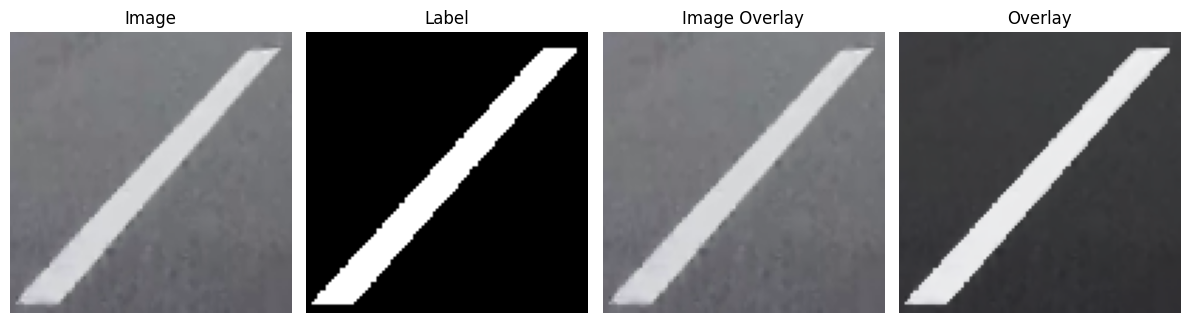

In [18]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_image(image_path, labeling_csv_path, target_size=(100, 100)):
    labeling_data = pd.read_csv(labeling_csv_path)

    
    filename = os.path.basename(image_path)
    image_label = labeling_data[labeling_data['filename'] == filename]

    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  
    label_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    for _, row in image_label.iterrows():
        points = eval(row['points'])  
        points = np.array(points).reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(label_mask, [points], 1)  

   
    image_resized = cv2.resize(image, target_size)
    label_mask_resized = cv2.resize(label_mask, target_size)

    return image_resized, label_mask_resized


image_dir = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/a'
labeling_csv_path = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/A_labeling.csv'


image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

X_train_a = []
y_train_a = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image_data, label_data = process_image(image_path, labeling_csv_path)
    X_train_a.append(image_data)
    y_train_a.append(label_data)


X_train_a = np.array(X_train_a)
y_train_a = np.array(y_train_a)


plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(X_train_a[43])
plt.title("Image")
plt.axis(False)

plt.subplot(142)
plt.imshow(y_train_a[43], cmap='gray')
plt.title("Label")
plt.axis(False)

plt.subplot(143)
plt.imshow(X_train_a[43])
plt.title("Image Overlay")
plt.axis(False)

plt.subplot(144)
plt.imshow(X_train_a[43])
plt.imshow(y_train_a[43], alpha=0.5, cmap='gray')
plt.title('Overlay')
plt.axis(False)

plt.tight_layout()
plt.show()


In [19]:
# 40도 간격으로 회전하여 증강
augmented_X_train_a, augmented_y_train_a = augment_images_with_rotation(X_train_a, y_train_a, rotation_interval=40)

# 증강된 데이터 확인
print("Augmented X_train_a shape:", augmented_X_train_a.shape)
print("Augmented y_train_a shape:", augmented_y_train_a.shape)

Augmented X_train_a shape: (2250, 100, 100, 3)
Augmented y_train_a shape: (2250, 100, 100)


# C_labeling npy

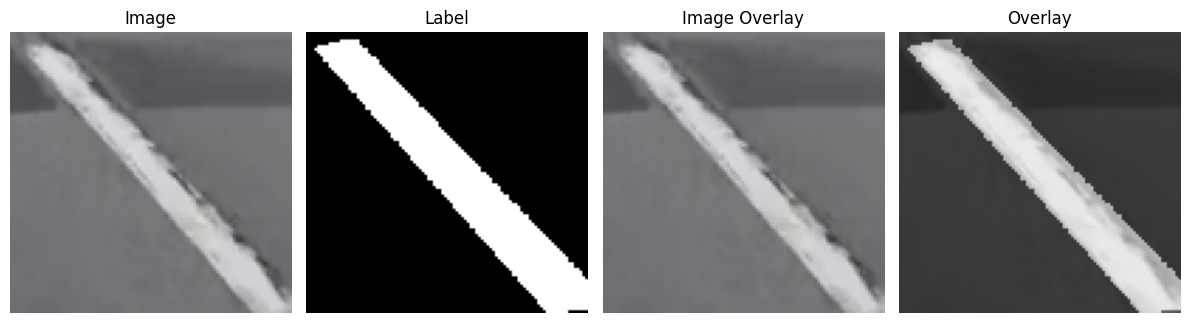

In [20]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_image(image_path, labeling_csv_path, target_size=(100, 100)):
   
    labeling_data = pd.read_csv(labeling_csv_path)

    
    filename = os.path.basename(image_path)
    image_label = labeling_data[labeling_data['filename'] == filename]

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  
    label_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    for _, row in image_label.iterrows():
        points = eval(row['points'])  
        points = np.array(points).reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(label_mask, [points], 2)  # polygon 2


    image_resized = cv2.resize(image, target_size)
    label_mask_resized = cv2.resize(label_mask, target_size)

    return image_resized, label_mask_resized


image_dir = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/c'
labeling_csv_path = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/C_labeling.csv'


image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

X_train_c = []
y_train_c = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image_data, label_data = process_image(image_path, labeling_csv_path)
    X_train_c.append(image_data)
    label_data[label_data != 2] = 0 
    y_train_c.append(label_data)


X_train_c = np.array(X_train_c)
y_train_c = np.array(y_train_c)


plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(X_train_c[43])
plt.title("Image")
plt.axis(False)

plt.subplot(142)
plt.imshow(y_train_c[43], cmap='gray')
plt.title("Label")
plt.axis(False)

plt.subplot(143)
plt.imshow(X_train_c[43])
plt.title("Image Overlay")
plt.axis(False)

plt.subplot(144)
plt.imshow(X_train_c[43])
plt.imshow(y_train_c[43], alpha=0.5, cmap='gray')
plt.title('Overlay')
plt.axis(False)

plt.tight_layout()
plt.show()


In [21]:
# 10도 간격으로 회전하여 증강
augmented_X_train_c, augmented_y_train_c = augment_images_with_rotation(X_train_c, y_train_c, rotation_interval=10)


print("Augmented X_train_c shape:", augmented_X_train_c.shape)
print("Augmented y_train_c shape:", augmented_y_train_c.shape)


Augmented X_train_c shape: (3024, 100, 100, 3)
Augmented y_train_c shape: (3024, 100, 100)


# F_labeling npy

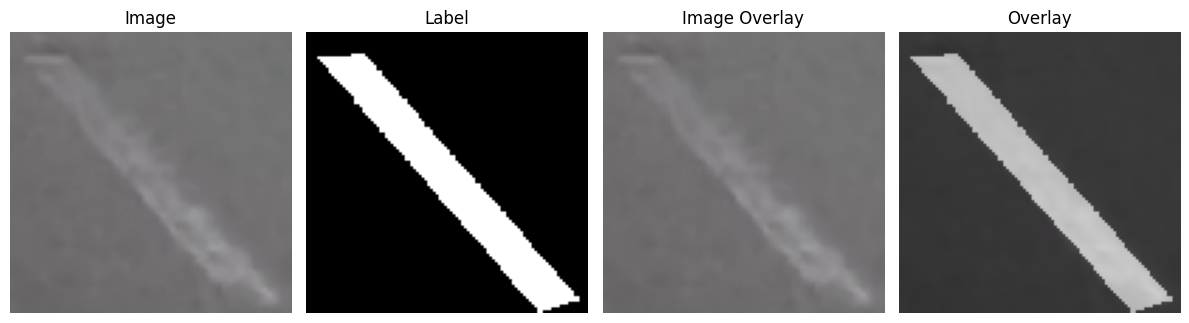

In [22]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_image(image_path, labeling_csv_path, target_size=(100, 100)):

    labeling_data = pd.read_csv(labeling_csv_path)


    filename = os.path.basename(image_path)
    image_label = labeling_data[labeling_data['filename'] == filename]

    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    label_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    for _, row in image_label.iterrows():
        points = eval(row['points'])  
        points = np.array(points).reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(label_mask, [points], 3) 


    image_resized = cv2.resize(image, target_size)
    label_mask_resized = cv2.resize(label_mask, target_size)

    return image_resized, label_mask_resized


image_dir = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/f'
labeling_csv_path = '/home/a202192006/차선훼손탐지(논문)/라벨링처리/F_labeling.csv'


image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

X_train_f = []
y_train_f = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image_data, label_data = process_image(image_path, labeling_csv_path)
    X_train_f.append(image_data)
    label_data[label_data != 3] = 0 
    y_train_f.append(label_data)


X_train_f = np.array(X_train_f)
y_train_f = np.array(y_train_f)


plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(X_train_f[43])
plt.title("Image")
plt.axis(False)

plt.subplot(142)
plt.imshow(y_train_f[43], cmap='gray')
plt.title("Label")
plt.axis(False)

plt.subplot(143)
plt.imshow(X_train_f[43])
plt.title("Image Overlay")
plt.axis(False)

plt.subplot(144)
plt.imshow(X_train_f[43])
plt.imshow(y_train_f[43], alpha=0.5, cmap='gray')
plt.title('Overlay')
plt.axis(False)

plt.tight_layout()
plt.show()


In [43]:
import cv2
import numpy as np

# 10도 간격으로 회전하여 증강
augmented_X_train_f, augmented_y_train_f = augment_images_with_rotation(X_train_f, y_train_f, rotation_interval=10)


print("Augmented X_train_f shape:", augmented_X_train_f.shape)
print("Augmented y_train_f shape:", augmented_y_train_f.shape)


Augmented X_train_f shape: (2124, 100, 100, 3)
Augmented y_train_f shape: (2124, 100, 100)


# 모델

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np


X_train = np.concatenate([augmented_X_train_a, augmented_X_train_c, augmented_X_train_f], axis=0)
y_train = np.concatenate([augmented_y_train_a, augmented_y_train_c, augmented_y_train_f], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)

(5918, 100, 100, 3)
(1480, 100, 100, 3)


In [46]:

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

input_shape = (100, 100, 3)
inputs = Input(shape=input_shape)

# Encoder
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Middle
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)

# Decoder
up8 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv1], axis=-1)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv8)

outputs = Conv2D(4, (1, 1), activation='softmax')(conv8)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_47 (Conv2D)             (None, 100, 100, 8)  224         ['input_7[0][0]']                
                                                                                                  
 conv2d_48 (Conv2D)             (None, 100, 100, 8)  584         ['conv2d_47[0][0]']              
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 50, 50, 8)   0           ['conv2d_48[0][0]']        

# 학습

In [47]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
185/185 [==============================] - 8s 16ms/step - loss: 1.1234 - accuracy: 0.7945 - val_loss: 0.6208 - val_accuracy: 0.8432
Epoch 2/10
185/185 [==============================] - 2s 13ms/step - loss: 0.5257 - accuracy: 0.8499 - val_loss: 0.4380 - val_accuracy: 0.8602
Epoch 3/10
185/185 [==============================] - 2s 13ms/step - loss: 0.4062 - accuracy: 0.8623 - val_loss: 0.3742 - val_accuracy: 0.8668
Epoch 4/10
185/185 [==============================] - 2s 13ms/step - loss: 0.3661 - accuracy: 0.8687 - val_loss: 0.3512 - val_accuracy: 0.8687
Epoch 5/10
185/185 [==============================] - 2s 13ms/step - loss: 0.3459 - accuracy: 0.8724 - val_loss: 0.3277 - val_accuracy: 0.8772
Epoch 6/10
185/185 [==============================] - 2s 13ms/step - loss: 0.3261 - accuracy: 0.8771 - val_loss: 0.3102 - val_accuracy: 0.8816
Epoch 7/10
185/185 [==============================] - 2s 13ms/step - loss: 0.3097 - accuracy: 0.8823 - val_loss: 0.2935 - val_accuracy: 0.8869

# 평가 지표

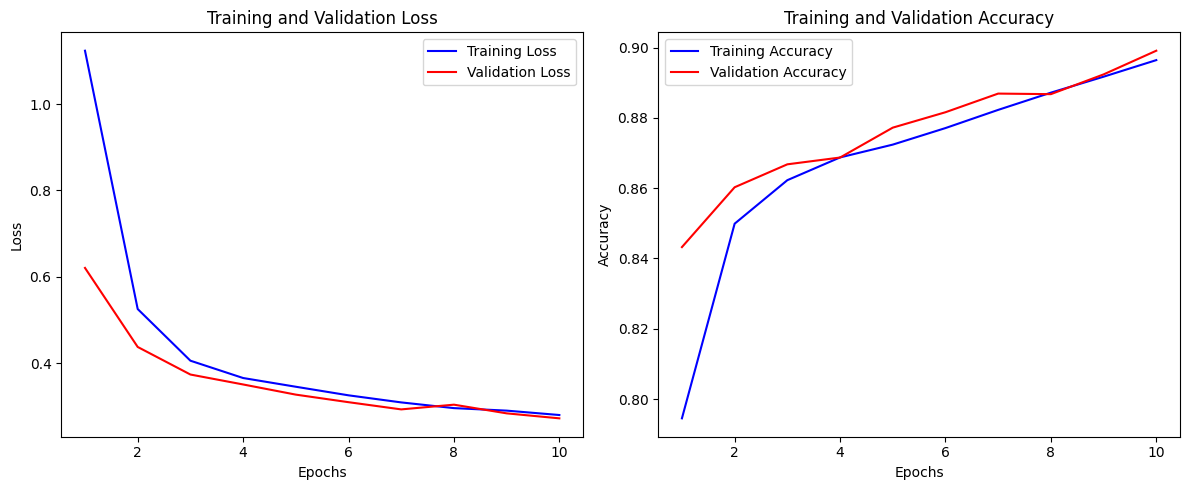

In [48]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_history(history)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)  # 각 픽셀에 대해 가장 높은 확률의 클래스 선택

# 평가를 위해 픽셀 단위로 변환 (1차원 배열로)
y_test_flat = y_test.flatten()
preds_flat = preds.flatten()

# 정밀도와 재현율 계산
precision = precision_score(y_test_flat, preds_flat, average='macro', zero_division=0) #True라고 분류한 것 중에서 실제 True인 것의 비율
recall = recall_score(y_test_flat, preds_flat, average='macro', zero_division=0) #  True인 것 중에서 모델이 True라고 예측한 것

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



47/47 [==============================] - 0s 5ms/step
Precision: 0.6112
Recall: 0.5764


# 결과 시각화

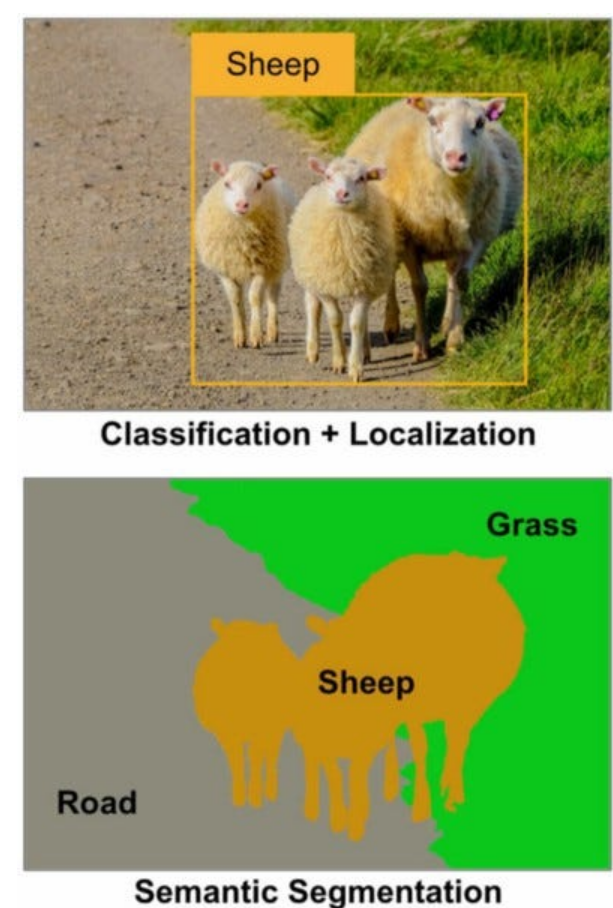

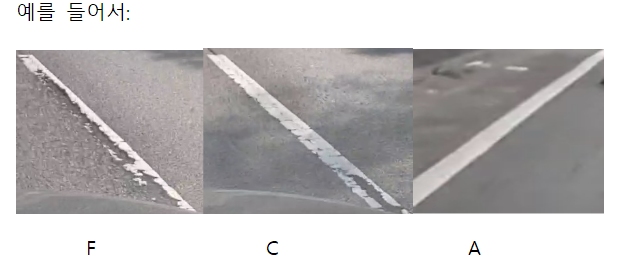

1/1 [==============================] - 0s 48ms/step


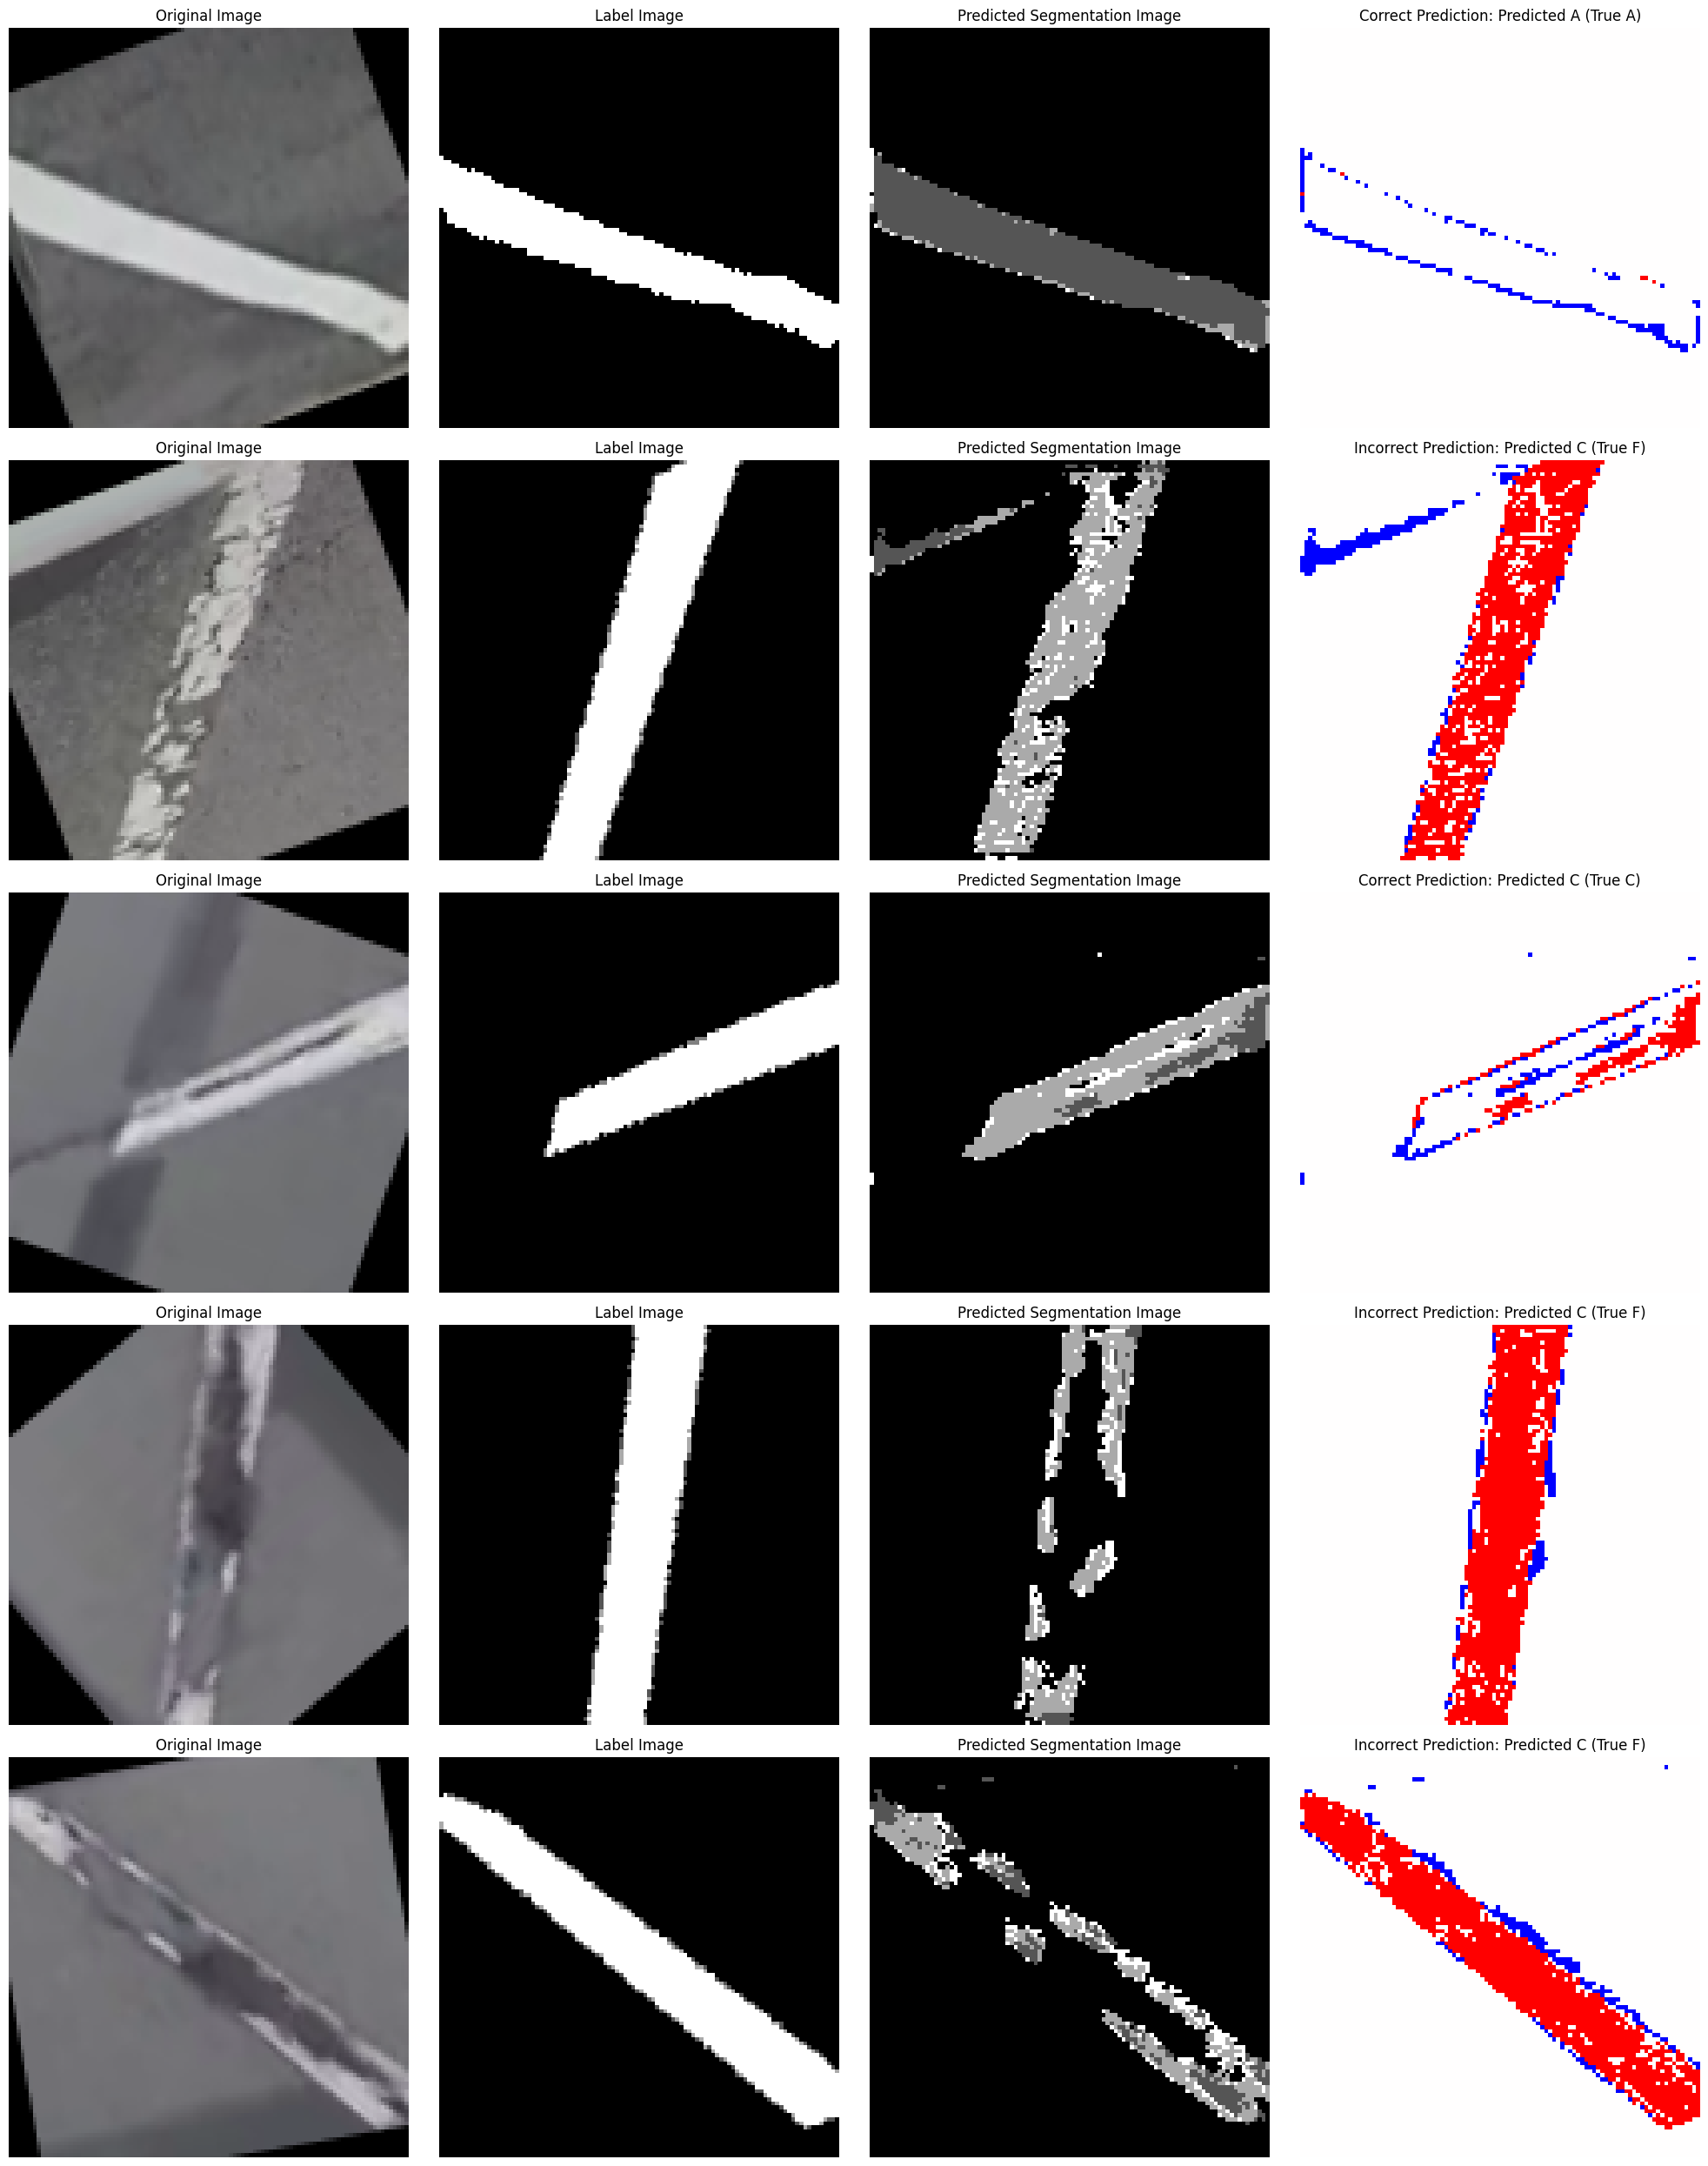

In [50]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


num_samples = 5  
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)


fig, axs = plt.subplots(num_samples, 4, figsize=(20, 5*num_samples))

for i, random_index in enumerate(random_indices):
    
    preds = model.predict(X_test[random_index:random_index+1])
    preds = np.argmax(preds, axis=-1)  # 각 픽셀에 대해 가장 높은 확률의 클래스 선택

    # 원본 이미지
    axs[i, 0].imshow(X_test[random_index])
    axs[i, 0].set_title("Original Image")
    axs[i, 0].axis('off')

    # 라벨 이미지
    axs[i, 1].imshow(y_test[random_index], cmap='gray')
    axs[i, 1].set_title("Label Image")
    axs[i, 1].axis('off')

    # 예측된 세그멘테이션 이미지
    axs[i, 2].imshow(preds[0], cmap='gray')
    axs[i, 2].set_title("Predicted Segmentation Image")
    axs[i, 2].axis('off')

    # 라벨과 예측 이미지의 차이
    diff = y_test[random_index] - preds[0]
    axs[i, 3].imshow(diff, cmap='bwr', vmin=-1, vmax=1)  # 라벨 - 예측 이미지의 차이를 시각화
    axs[i, 3].set_title("Difference Image (Label - Predicted)")
    axs[i, 3].axis('off')
    


    # 라벨 A, C, F 판별
    if np.sum(preds[0] == 1) > np.sum(preds[0] == 2) and np.sum(preds[0] == 1) > np.sum(preds[0] == 3):
        predicted_label = 'A'
    elif np.sum(preds[0] == 2) > np.sum(preds[0] == 1) and np.sum(preds[0] == 2) > np.sum(preds[0] == 3):
        predicted_label = 'C'
    elif np.sum(preds[0] == 3) > np.sum(preds[0] == 1) and np.sum(preds[0] == 3) > np.sum(preds[0] == 2):
        predicted_label = 'F'
    else:
        predicted_label = 'Unknown'

    # 실제 라벨 판별
    if np.sum(y_test[random_index] == 1) > np.sum(y_test[random_index] == 2) and np.sum(y_test[random_index] == 1) > np.sum(y_test[random_index] == 3):
        true_label = 'A'
    elif np.sum(y_test[random_index] == 2) > np.sum(y_test[random_index] == 1) and np.sum(y_test[random_index] == 2) > np.sum(y_test[random_index] == 3):
        true_label = 'C'
    elif np.sum(y_test[random_index] == 3) > np.sum(y_test[random_index] == 1) and np.sum(y_test[random_index] == 3) > np.sum(y_test[random_index] == 2):
        true_label = 'F'
    else:
        true_label = 'Unknown'

 
    if predicted_label == true_label:
        axs[i, 3].set_title(f"Correct Prediction: Predicted {predicted_label} (True {true_label})")
    else:
        axs[i, 3].set_title(f"Incorrect Prediction: Predicted {predicted_label} (True {true_label})")

    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()


 파란색은 라벨링에 없는 픽셀을 예측 한거고 , 빨간색은  정답 라벨링과 다른 라벨로 예측

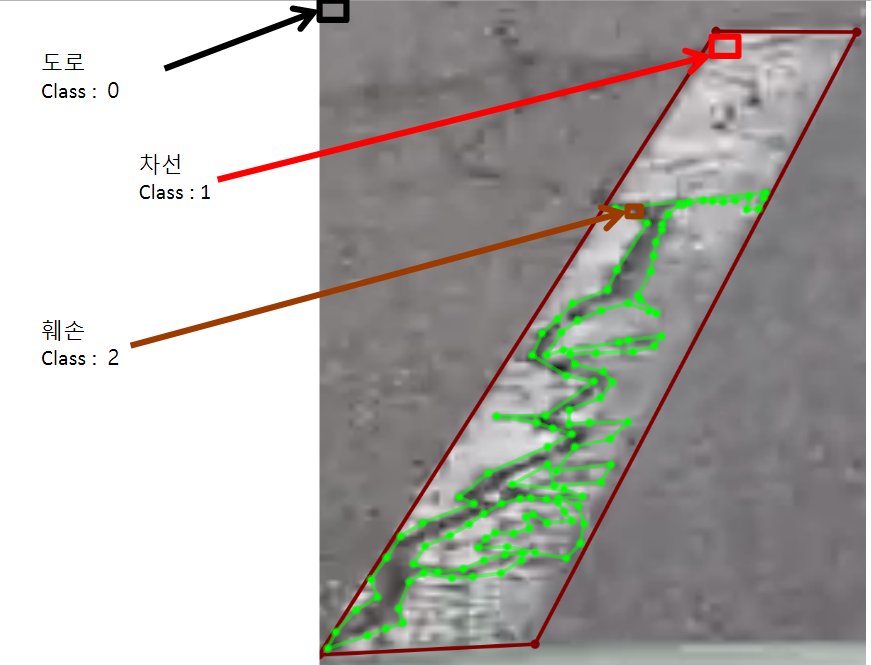

향후　예측후　훼손　비율　％　을　가지고　훼손정도　파악